<a href="https://colab.research.google.com/github/ArunAmballa/Animal-Image-Classification-Using-CNN/blob/master/VGG16Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U keras-tuner

     |████████████████████████████████| 98 kB 4.5 MB/s 


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras_tuner import RandomSearch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from PIL import Image
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/Colab Data/Plant Disease/train'
, target_size=(224,224), class_mode='categorical',color_mode='rgb',batch_size=32)

Found 5702 images belonging to 3 classes.


In [ ]:
x_train.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [ ]:
x_test=test_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/Colab Data/Plant Disease/test'
, target_size=(224,224), class_mode='categorical',color_mode='rgb',batch_size=32)

Found 1426 images belonging to 3 classes.


In [ ]:
pretrained_model=VGG16(weights='imagenet')

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model=Sequential()
for layers in pretrained_model.layers[:-1]:
  model.add(layers)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layers in model.layers:
    layers.trainable=False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
 model.add(Dense(units=3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
def build_model(hp):
  model.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4,1e-5,1e-6])),metrics=['accuracy'])
  return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=7)

In [ ]:
tuner.search(x_train,epochs=10,validation_data=x_test)

Trial 3 Complete [00h 11m 15s]
val_accuracy: 0.9530154466629028

Best val_accuracy So Far: 0.9530154466629028
Total elapsed time: 00h 58m 10s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 1e-05
Score: 0.9530154466629028
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9460027813911438
Trial summary
Hyperparameters:
learning_rate: 0.001
Score: 0.9214586019515991


In [ ]:
 model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=1e-4),metrics=['accuracy'])

In [23]:
model.fit(x_train,validation_data=x_test,batch_size=32,epochs=20)

Epoch 1/20
179/179 [==============================] - 69s 383ms/step - loss: 0.1876 - accuracy: 0.9458 - val_loss: 0.1648 - val_accuracy: 0.9530
Epoch 2/20
179/179 [==============================] - 67s 374ms/step - loss: 0.1863 - accuracy: 0.9476 - val_loss: 0.1576 - val_accuracy: 0.9544
Epoch 3/20
179/179 [==============================] - 67s 373ms/step - loss: 0.1824 - accuracy: 0.9435 - val_loss: 0.1921 - val_accuracy: 0.9411
Epoch 4/20
179/179 [==============================] - 66s 370ms/step - loss: 0.1762 - accuracy: 0.9484 - val_loss: 0.1739 - val_accuracy: 0.9467
Epoch 5/20
179/179 [==============================] - 67s 373ms/step - loss: 0.1774 - accuracy: 0.9462 - val_loss: 0.1809 - val_accuracy: 0.9439
Epoch 6/20
179/179 [==============================] - 66s 370ms/step - loss: 0.1703 - accuracy: 0.9495 - val_loss: 0.1573 - val_accuracy: 0.9523
Epoch 7/20
179/179 [==============================] - 66s 370ms/step - loss: 0.1707 - accuracy: 0.9467 - val_loss: 0.1727 - val_ac

In [24]:
model.save('Potato.h5')

In [25]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
model=load_model('Potato.h5')

In [27]:
def detect(image):
  image=cv2.resize(image,(224,224))
  image=np.array([image])
  if(np.max(image)>1):
    image=image/255.0
  predict=model.predict(image)
  prediction=np.argmax(predict,axis=1)
  data=['Early','Late','Healthy']
  prediction=data[prediction[0]]
  print(prediction)


Healthy


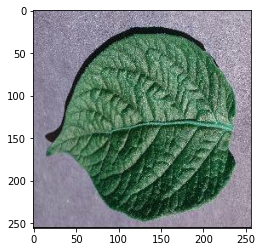

In [28]:
frame=cv2.imread(r'/content/drive/MyDrive/Colab Data/Plant Disease/test/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864_new90degFlipTB.JPG')
plt.imshow(frame)
data=detect(frame)